# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?

    Based on the grouped kernel density plot and summary statistic description, the most expensive car brand is MG Motors. Most car brands have affordable options even if their average price is much higher.
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?

    In our first model with numeric variables alone, the $R^2$ value is 0.0590231824090548 and the RMSE value is 368589.6874411169. In our second model for categorical variables, the $R^2$ value is 0.729378072151925 and the RMSE value is 193470.59659108112. Based on these results, we can conclude that the model made of categorical variables is much better based on these statistics. For the joint model, the $R^2$ value is 0.7430864654302525 and the RMSE value is 188506.77831428335. This model has the highest $R^2$ value, so we can conclude that it is the best out of these three.

  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?

    As the degree increases,the $R^2$ value decreases and the RMSE value increases. $R^2$ goes negative at a degree of 6 on the test set. The best model has a degree of one and an $R^2$ of 0.7430864654302525 and an RMSE of 188506.77831428335. The $R^2$ values for this model are lower than our previous. These models are worse than our models from part 3.

  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.

    The predicted and true values do roughly line up along the diagonal. Examining the residual kernel density plot, it does look roughly bell-shaped around zero. One could argue that the model is not comprehensive as a weakness, whereas one could point to the relevant model statistics as a strength.


  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?

    The depth tree with the best result is 6, with a $R^2$ of 0.726558339473923.

  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?

    The predicted and true values do appear to line up along the diagonal. The residuals do look roughly bell-shaped around zero.

  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

    The regression tree has better performance on the test set based on the $R^2$ and RMSE values.

In [25]:
import pandas as pd
import seaborn as sns
import numpy as np

# q1.1 - additional cleaning

cars_df = pd.read_csv('cars_hw.csv')
cars_df.head()
# print(cars_df.dtypes)

# clean make_year, no_of_owners, and remove unnamed column

cars_df['Make_Year'] = cars_df['Make_Year'].astype('category')

cars_df['No_of_Owners'] = cars_df['No_of_Owners'].str.replace(r'\D', '', regex=True).astype(int)

cars = cars_df.drop(cars_df.columns[0], axis = 1)

y = cars['Price']
X = cars.drop('Price',axis=1)

# check for outliers
# print(X['No_of_Owners'].plot.box()) # some outliers so windsorize
# print(X['Seating_Capacity'].plot.box()) # some outliers so windsorize
# print(X['Mileage_Run'].plot.box()) ## no apparant outliers

#windsorize outliers
def windsorize(x):
      # Convert to a NumPy array
    x = np.array(x)
    # Compute IQR and 1st,3rd quantiles
    per25, per75 = np.percentile(x,[25,75])
    iqr = per75 - per25
    # Compute whiskers:
    lower_whisker = per25 - iqr*1.5
    upper_whisker = per75 + iqr*1.5
    # Windsorize x:
    x_windsor = x
    x_windsor[ x < lower_whisker ] = lower_whisker
    x_windsor[ x > upper_whisker ] = upper_whisker
    return(x_windsor)

X['No_of_Owners'] = X['No_of_Owners'].apply(windsorize)
X['Seating_Capacity'] = X['Seating_Capacity'].apply(windsorize)
# X.head()

# check numerical
# X['Mileage_Run'].hist()
# X['No_of_Owners'].hist()
# need to transform no_of_owners
X['owners_log'] = np.log(cars['No_of_Owners'])
# X['owners_log'].hist(bins=20,grid=False)

# X['Seating_Capacity'].hist()

X['seatcap_log'] = np.log(cars['Seating_Capacity'])
# X['seatcap_log'].hist(bins=20,grid=False)

# remove pre-transformed columns
dropcol = ['Seating_Capacity', 'No_of_Owners']
X = X.drop(columns=dropcol, axis=1)

X.head()
# cleaned!

,Make,Make_Year,Color,Body_Type,Mileage_Run,Fuel_Type,Transmission,Transmission_Type,owners_log,seatcap_log
0,Volkswagen,2017,silver,sedan,44611,diesel,7-Speed,Automatic,0.000000,1.609438
1,Hyundai,2016,red,crossover,20305,petrol,5-Speed,Manual,0.000000,1.609438
2,Honda,2019,white,suv,29540,petrol,5-Speed,Manual,0.693147,1.609438
3,Renault,2017,bronze,hatchback,35680,petrol,5-Speed,Manual,0.000000,1.609438
4,Hyundai,2017,orange,hatchback,25126,petrol,5-Speed,Manual,0.000000,1.609438


<Axes: ylabel='Density'>

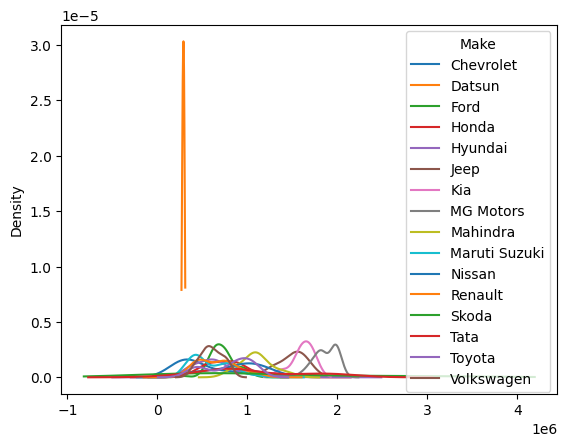

In [31]:
#q1.2
# plot and description w/o grouping
# cars_df['Price'].describe()
# cars['Price'].plot.density() # The kernel density plot for age

# w/ grouping
cars['Price'].groupby(cars['Make']).describe()

# avg price by make
average_price_by_make = cars.groupby('Make')['Price'].mean()

pd.options.display.float_format = '{:.2f}'.format

# print(average_price_by_make)

# kernel density plot grouped by make and model:
group_by = 'Make'
var = 'Price'
df_wide = cars.pivot(columns=group_by,values=var)
df_wide.plot.density()

In [32]:
#q1.3
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
TSS = np.sum( (y_test - y_train.mean())**2 )
N_test = len(y_test)

In [41]:
#1.4
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import OneHotEncoder

# remove categorical variables and do numerical analysis
dropcol = ['Make', 'Make_Year', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
X_numtest = X_test.drop(columns=dropcol, axis=1)
X_numtrain = X_train.drop(columns=dropcol, axis=1)

X_numtrain.head()

from sklearn.linear_model import LinearRegression # Import linear regression model

reg = LinearRegression().fit(X_numtrain, y_train) # Fit the linear model

print(reg.intercept_) # Intercept value
print(reg.coef_) # Regression coefficients
print(reg.score(X_numtrain, y_train)) # R squared measure

y_hat_lm = reg.predict(X_numtest)
residuals_lm = y_test - y_hat_lm
mse = mean_squared_error(y_test, y_hat_lm, squared = False)
print(mse)

# do categorical analysis
categorical_vars = ['Make', 'Make_Year', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
X_traincat = X_train[categorical_vars]
X_testcat = X_test[categorical_vars]

encoder = OneHotEncoder(sparse=False, drop='first')
Xtrain_encoded = encoder.fit_transform(X_traincat)
Xtest_encoded = encoder.transform(X_testcat)

model = LinearRegression()
model.fit(Xtrain_encoded, y_train)
r2_cat = model.score(Xtest_encoded, y_test)
y_pred_cat = model.predict(Xtest_encoded)
rmse_cat = np.sqrt(np.mean((y_pred_cat - y_test) ** 2))
print("R2:", r2_cat)
print("RMSE:", rmse_cat)

#combined model
X_combined_train = np.concatenate((X_numtrain, Xtrain_encoded), axis=1)
X_combined_test = np.concatenate((X_numtest, Xtest_encoded), axis=1)

model_combined = LinearRegression()
model_combined.fit(X_combined_train, y_train)
r2_combined = model_combined.score(X_combined_test, y_test)
y_pred_combined = model_combined.predict(X_combined_test)
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test) ** 2))
print("R2:", r2_combined)
print("RMSE:", rmse_combined)


126878.82594734302
[-2.18055115e+00 -2.09264832e+05  4.46049132e+05]
0.0590231824090548
368589.6874411169
R2: 0.729378072151925
RMSE: 193470.59659108112
R2: 0.7430864654302525
RMSE: 188506.77831428335


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [48]:
#q1.5

# Expand features
expander = PolynomialFeatures(degree=1,include_bias=False)    # switch out degree varaible to see different degree differences
Z_train = expander.fit_transform(X_numtrain) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out()
X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe

Z_test = expander.fit_transform(X_numtest) # Pass the df into the expander to get powers/interactions of x and y
names = expander.get_feature_names_out()
X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

# Categorical Variables with one hot encoding model
categorical_vars = ['Make', 'Make_Year', 'Color', 'Body_Type', 'Fuel_Type', 'Transmission', 'Transmission_Type']
X_traincat = X_train[categorical_vars]
X_testcat = X_test[categorical_vars]

encoder = OneHotEncoder(sparse=False, drop='first')
Xtrain_encoded = encoder.fit_transform(X_traincat)
Xtest_encoded = encoder.transform(X_testcat)

X_combined_train = np.concatenate((X_train_lm, Xtrain_encoded), axis=1)
X_combined_test = np.concatenate((X_test_lm, Xtest_encoded), axis=1)

model_combined = LinearRegression()
model_combined.fit(X_combined_train, y_train)
r2_combined = model_combined.score(X_combined_test, y_test)
y_pred_combined = model_combined.predict(X_combined_test)
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test) ** 2))
print("R2:", r2_combined)
print("RMSE:", rmse_combined)

#loop for 1-9
for i in range(1,10):
  # Expand features with degree i
  expander = PolynomialFeatures(degree=i,include_bias=False) # Create the expander
  Z_train = expander.fit_transform(X_numtrain) # Pass the df into the expander to get powers/interactions of x and y
  names = expander.get_feature_names_out() # Get the names of these variables
  X_train_lm = pd.DataFrame(data=Z_train, columns = names) # Create a new, expanded dataframe

  Z_test = expander.fit_transform(X_numtest) # Pass the df into the expander to get powers/interactions of x and y
  names = expander.get_feature_names_out() # Get the names of these variables
  X_test_lm = pd.DataFrame(data=Z_test, columns = names) # Create a new, expanded dataframe

  # combine datasets
  X_combined_train = np.concatenate((X_train_lm, Xtrain_encoded), axis=1)
  X_combined_test = np.concatenate((X_test_lm, Xtest_encoded), axis=1)

  # run new model
  model_combined = LinearRegression()
  model_combined.fit(X_combined_train, y_train)
  r2_combined = model_combined.score(X_combined_test, y_test)
  y_pred_combined = model_combined.predict(X_combined_test)
  rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test) ** 2))
  print("Degree: ", i)
  print("R2:", r2_combined)
  print("RMSE:", rmse_combined)
  print('-----------------------')


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


R2: 0.7430864654302525
RMSE: 188506.77831428335
Degree:  1
R2: 0.7430864654302525
RMSE: 188506.77831428335
-----------------------
Degree:  2
R2: 0.7401140665559627
RMSE: 189594.12074681857
-----------------------
Degree:  3
R2: 0.6665466743435084
RMSE: 214758.81833062955
-----------------------
Degree:  4
R2: 0.01813636306233435
RMSE: 368518.3069595352
-----------------------
Degree:  5
R2: 0.025640247380056103
RMSE: 367107.40711167833
-----------------------
Degree:  6
R2: -0.034841368181009136
RMSE: 378329.6423339519
-----------------------
Degree:  7
R2: -0.09267281953922302
RMSE: 388757.29276719125
-----------------------
Degree:  8
R2: -0.04097908325782296
RMSE: 379449.9331779212
-----------------------
Degree:  9
R2: -0.36103020443015454
RMSE: 433877.7314418969
-----------------------


R2: 0.7430864654302525
RMSE: 188506.77831428335


<ipython-input-53-f71737837ac9>:31: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(res, shade=True)


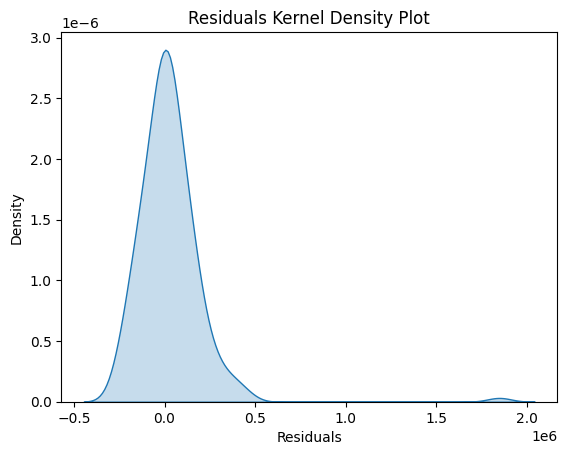

In [53]:
# q1.6
# best model
import matplotlib.pyplot as plt

X_combined_train = np.concatenate((X_numtrain, Xtrain_encoded), axis=1)
X_combined_test = np.concatenate((X_numtest, Xtest_encoded), axis=1)

model_combined = LinearRegression()
model_combined.fit(X_combined_train, y_train)
r2_combined = model_combined.score(X_combined_test, y_test)
y_pred_combined = model_combined.predict(X_combined_test)
rmse_combined = np.sqrt(np.mean((y_pred_combined - y_test) ** 2))
print("R2:", r2_combined)
print("RMSE:", rmse_combined)

# scatter plot
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test, y_pred_combined, alpha=0.5)
# plt.title("Predicted vs. True Values")
# plt.xlabel("True Values")
# plt.ylabel("Predicted Values")

# # add perfect prediction line (diagonal)
# plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# plt.show()

# residuals:
res = y_test - y_pred_combined

sns.kdeplot(res, shade=True)
plt.title("Residuals Kernel Density Plot")
plt.xlabel("Residuals")

# Show the plot
plt.show()

In [58]:
#q1.7

X_traincode= pd.get_dummies(X_train, drop_first=True)
X_testcode = pd.get_dummies(X_test, drop_first=True)

# deal w missing columns
misscol = set(X_traincode.columns) - set(X_testcode.columns)

for col in misscol:
    X_testcode[col] = 0

X_testcode = X_testcode[X_traincode.columns]

## Decision Trees
from sklearn import tree

for i in range(1,10):
  D = i
  model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
  cart = model.fit(X_traincode, y_train)

  ## Make Predictions on the Test Set
  y_hat_cart = cart.predict(X_testcode)
  residuals_cart = y_test - y_hat_cart

  ## Metrics:
  SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
  MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
  RMSE_cart = (SSE_cart/N_test)**(1/2)
  R2_cart = 1 - SSE_cart/TSS

  print("Depth: ", D)
  print('R2:', R2_cart)
  print('SSE:', SSE_cart)
  print('----------------')

Depth:  1
R2: 0.715621721890532
SSE: 7752925005258.348
----------------
Depth:  2
R2: 0.7245029359218768
SSE: 7510798965258.348
----------------
Depth:  3
R2: 0.725614013665615
SSE: 7480507965258.348
----------------
Depth:  4
R2: 0.7048110953285598
SSE: 8047652076369.459
----------------
Depth:  5
R2: 0.7210240699092509
SSE: 7605642310813.902
----------------
Depth:  6
R2: 0.7213668202289323
SSE: 7596298005258.348
----------------
Depth:  7
R2: 0.7188244747380051
SSE: 7665609255258.348
----------------
Depth:  8
R2: 0.7170112435769948
SSE: 7715042866369.459
----------------
Depth:  9
R2: 0.7193008705696345
SSE: 7652621409702.792
----------------


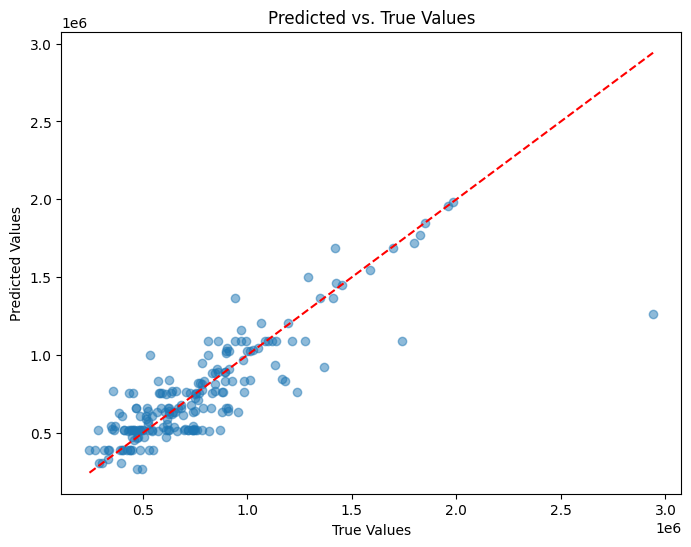

In [59]:
#q1.8

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_hat_cart, alpha=0.5)
plt.title("Predicted vs. True Values")
plt.xlabel("True Values")
plt.ylabel("Predicted Values")

# Add a 45-degree line for reference (perfect predictions)
plt.plot([min(y_test), max(y_test)], [min(y_test), max(y_test)], color='red', linestyle='--')

# Show the plot
plt.show()


<ipython-input-60-757f6e9505f3>:4: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(residuals_cart, shade=True)


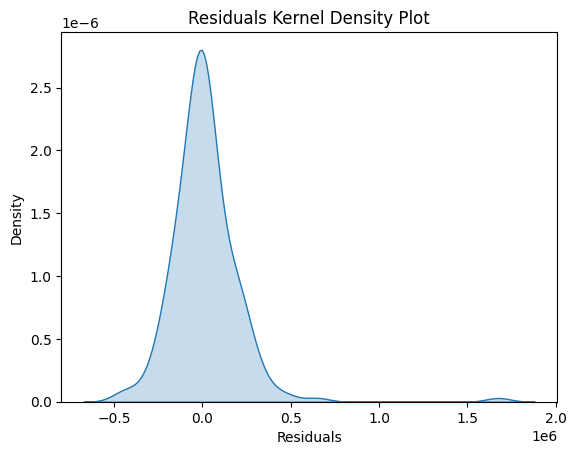

In [60]:
# residuals:
residuals_cart = y_test - y_hat_cart

sns.kdeplot(residuals_cart, shade=True)
plt.title("Residuals Kernel Density Plot")
plt.xlabel("Residuals")

# Show the plot
plt.show()

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set?
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4?
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high
    - Husband's education (categorical) 1=low, 2, 3, 4=high
    - Number of children ever born (numerical)
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?


    In our table, 1 represents no contraception, 3 represents short term, 2 represents long term. Our table shows that long term contraceptives are uncommon. Couples with 0-2 kids seem to use no contraception. Couples with 3-5 kids use short term contraception. Couples with 6 kids the majority of the time do not use contraception. From these data, we cannot say that couples who use contraception tend to have more children then those who don't.


  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.


    In the context of this problem, we are trying to predict what type of contraceptive method people are using. Based on this, the node values do not make sense, as they do not represent the established contraceptive methods of 1,2, and 3, instead representing which group the row will be in. So, it is not useful in prediction contraceptive type.

  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?


    Within the classification tree, we can see that the model groups rows into the three contraception methods, with the final nodes sorting people into either 2 or 3. The value = [] row tells are where the model has put the rows, with the variables we used in to predict the method of contraception in x[0].

  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.


    Our model's accuracy is pretty high, with only one misclassification. We can conclude our model's accuracy is around 99%

  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.


    We cannot use linear regression to model this data as we have more than two classes. We have three contraceptive methods we are trying to predict, and linear regression only allows for 2 outputs.

In [62]:
#q3.1
cont = pd.read_csv('contraception_hw.csv')
cont.head()

# tabulate
cont['method'].value_counts()

# cross tabulate
pd.crosstab(cont['method'], cont['numberChildren'])

numberChildren,0,1,2,3,4,5,6,7,8,9,10,11,12,13,16
method,,,,,,,,,,,,,,,
1,95,143,114,70,57,44,35,18,29,5,9,6,4,0,0
2,0,46,56,70,62,36,27,19,9,3,2,2,0,1,0
3,2,87,106,119,78,55,30,12,9,8,0,3,0,1,1


In [64]:
#q3.2
y = cont['method']
print(y.describe())
X = cont.drop('method',axis=1)
X.head()

# change method column to a factor
cont['method'] = cont['method'].astype('category')

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)

count   1473.00
mean       1.92
std        0.88
min        1.00
25%        1.00
50%        2.00
75%        3.00
max        3.00
Name: method, dtype: float64


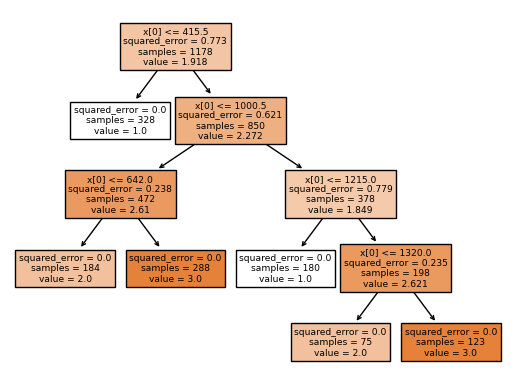

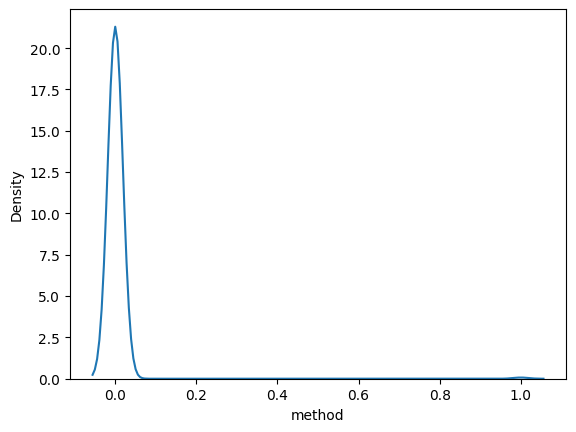

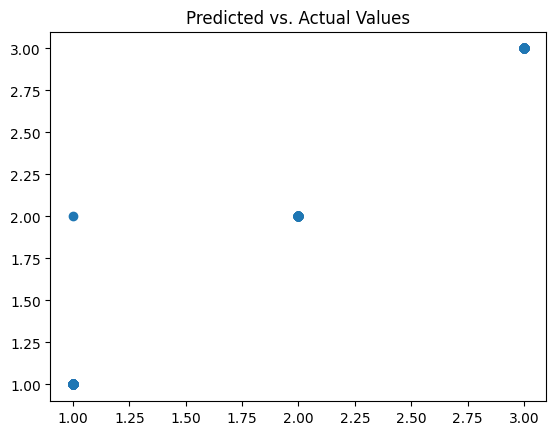

R2: 0.9999999999999634
MSE 0.00510204081632653


In [66]:
#q3.3
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

from sklearn import tree

model = tree.DecisionTreeRegressor(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)
plt.show()

# test set predictions
y_hat_cart = cart.predict(X_test)
residuals_cart = y_test - y_hat_cart

# residual plot
sns.kdeplot(residuals_cart)
plt.show()

# actual versus predicted plot
plt.scatter(x=y_hat_cart,y=y_test)
plt.title('Predicted vs. Actual Values')
plt.show()


# metrics
SSE_cart = np.sum( (y_test-y_hat_cart)**2 )
MSE_cart = (1/N_test)*np.sum( (y_test-y_hat_cart)**2 )
RMSE_cart = (SSE_cart/N_test)**(1/2)
R2_cart = 1 - SSE_cart/TSS

print('R2:',R2_cart)
print('MSE', MSE_cart)

In [67]:
#q3.4
def performance(y_test,y_hat): # Sample code to compute classifier performance
    tab = pd.crosstab(np.array(y_hat),np.array(y_test))

    tp = tab.iloc[0,0]
    tn = tab.iloc[1,1]
    fp = tab.iloc[0,1]
    fn = tab.iloc[1,0]
    tot = tp+tn+fp+fn

    acc = (tp+tn)/tot
    spec = tn/(tp+fn)
    sens = tp/(tp+fn)
    mcc = (tp*tn-fp*fn)/np.sqrt((tp+fp)*(tp+fn)*(tn+fp)*(tn+fn))

    return({'confusion_matrix':tab,
            'accuracy':acc,
            'specificity':spec,
            'sensitivity':sens,
            'mcc':mcc})

{'confusion_matrix': col_0    1   2    3
row_0              
1      121   1    0
2        0  73    0
3        0   0  100, 'accuracy': 0.9948717948717949, 'specificity': 0.6033057851239669, 'sensitivity': 1.0, 'mcc': 0.989141310268265}
R2: 0.9999999999999634
MSE 0.00510204081632653


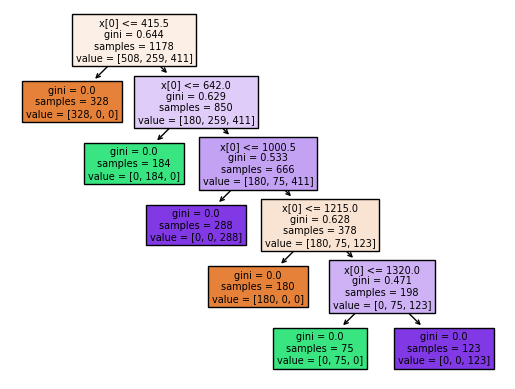

In [70]:
#decision tree
from sklearn import tree

model = tree.DecisionTreeClassifier(max_depth=10) # Fit the classifier
cart = model.fit(X_train, y_train)
tree.plot_tree(cart,filled=True)

# test set predictions
y_hat_cart = cart.predict(X_test)

# performance:
perf_cart = performance(y_test,y_hat_cart)
print(perf_cart)

# metrics
print('R2:',R2_cart)
print('MSE', MSE_cart)

In [71]:
#q3.5

#test set predictions
y_hat = cart.predict(X_test)

# confusion matrix and accuracy
tab = pd.crosstab(y_test,y_hat) # Compute confusion matrix
acc = (tab.iloc[0,0]+tab.iloc[1,1])/(tab.iloc[0,0]+tab.iloc[1,1]+tab.iloc[0,1]+tab.iloc[1,0]) # Compute Accuracy
print('Accuracy: ', acc, '\n')
pd.crosstab(y_test,y_hat)

Accuracy:  0.9948717948717949 



col_0,1,2,3
method,,,
1,121,0,0
2,1,73,0
3,0,0,100


**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?